# Train Local Model

En este código vamos a entrenar cada miembro del equipo el mismo modelo, cada uno con diferentes datos.

Archivos necesarios:

* model.py
* train_fold#.npz
* test.npz

**Modificar el nombre del archivo a leer (train_fold#.npz) y el modelo al momento de guardarlo (model_fold#.keras)**

### Librerías

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

from model import cnn_model # Nuestro modelo

### Importar datasets de entrenamiento y prueba

Importamos el dataset de entrenamiento que tocó a cada integrante y el datasets de prueba.

In [4]:
# Cargar datos de entrenamiento y de prueba
data_fold1 = np.load('train_fold4.npz') ####### Modificar número de fold
test_data = np.load('test_data.npz')

In [5]:
# Guardar datos de entrenamiento y prueba en sus variables X y Y
x_train = data_fold1['x']
y_train = data_fold1['y']

x_test = test_data['x']
y_test = test_data['y']

# Mostramos el shape de cada subset
print(f"Entrenamiento  ---> \tX: {x_train.shape}\ty: {y_train.shape}")
print(f"Prueba  ---> \t\tX: {x_test.shape}\ty: {y_test.shape}")

Entrenamiento  ---> 	X: (12000, 28, 28, 1)	y: (12000,)
Prueba  ---> 		X: (10000, 28, 28, 1)	y: (10000,)


### Definición del modelo

In [6]:
cnn_model = cnn_model.model()
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [7]:
def train_local_model(model, x_train, y_train, x_test, y_test, epochs=20, save_name="model"):
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6095 - loss: 1.1759 - val_accuracy: 0.9518 - val_loss: 0.1800
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9260 - loss: 0.2545 - val_accuracy: 0.9672 - val_loss: 0.1136
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9458 - loss: 0.1764 - val_accuracy: 0.9712 - val_loss: 0.0981
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9541 - loss: 0.1451 - val_accuracy: 0.9776 - val_loss: 0.0724
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9629 - loss: 0.1196 - val_accuracy: 0.9793 - val_loss: 0.0669
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9634 - loss: 0.1130 - val_accuracy: 0.9780 - val_loss: 0.0694
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9702 - loss: 0.0947 - val_accuracy: 0.9821 - val_loss: 0.0583
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9691 - loss: 0.0916 - val_accuracy: 0.

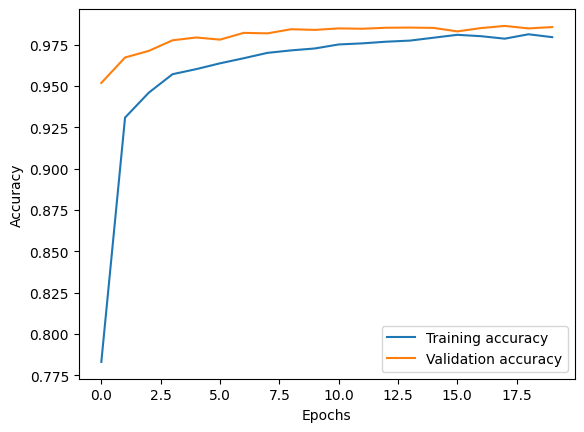

In [8]:
model = train_local_model(cnn_model, x_train, y_train, x_test, y_test)

In [9]:
model.save(f'model_fold4.keras') ### Modificar número de fold